In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 1: Data Preparation

In [2]:
# Load the dataset
dataset = pd.read_excel("heart_disease.xlsx", sheet_name="Heart_disease")
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


# Step 2: Exploratory Data Analysis (EDA)

In [3]:
# Check for missing values
print("Missing Values:\n", dataset.isnull().sum())

Missing Values:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


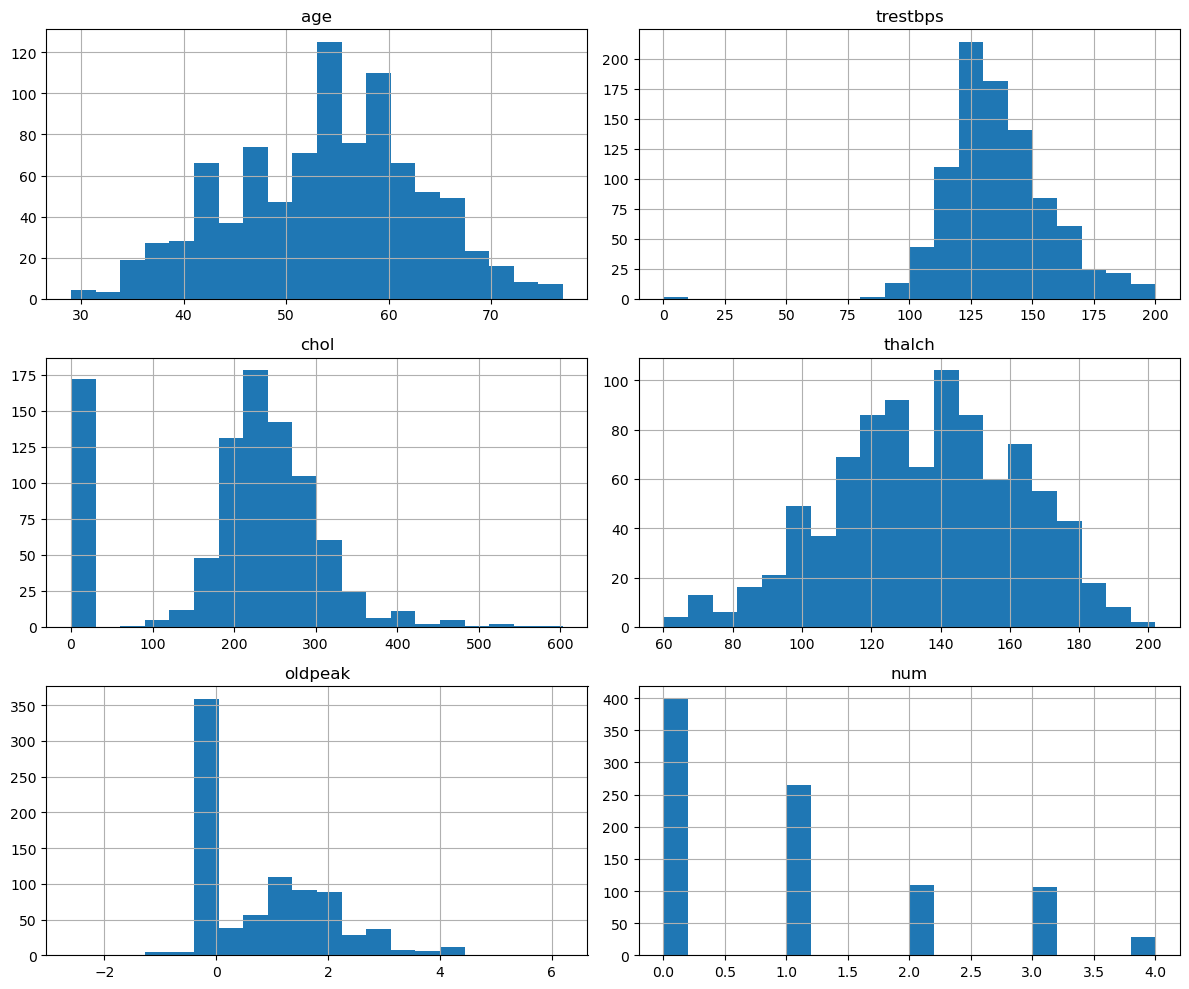

In [4]:
# Visualize feature distribution
dataset.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

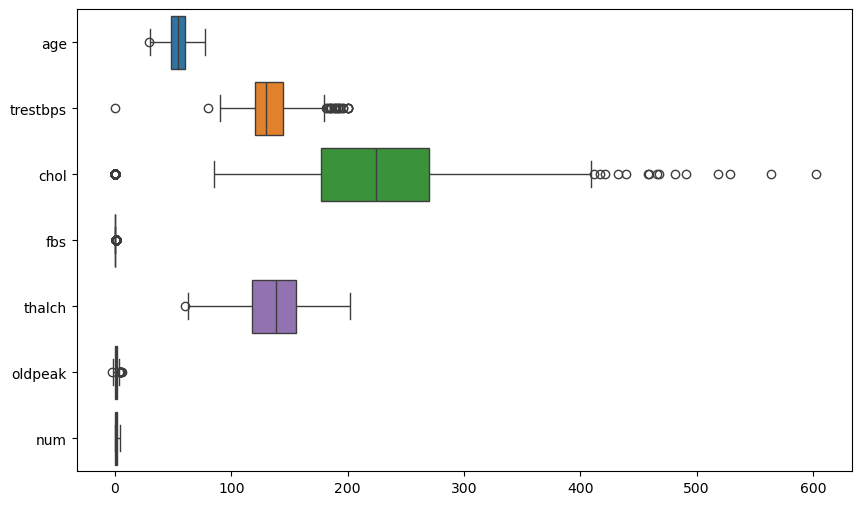

In [5]:
# Boxplot to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=dataset, orient='h')
plt.show()

# Step 3: Feature Engineering

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
# Handling missing values
if dataset['oldpeak'].isnull().sum() > 0:
    dataset['oldpeak'].fillna(dataset['oldpeak'].median(), inplace=True)
if dataset['exang'].isnull().sum() > 0:
    dataset['exang'].fillna(dataset['exang'].mode()[0], inplace=True)

In [8]:
# Encoding categorical variables
dataset['sex'] = dataset['sex'].map({'Male': 1, 'Female': 0})
dataset['exang'] = dataset['exang'].map({'TRUE': 1, 'FALSE': 0})
dataset = pd.get_dummies(dataset, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True)
dataset

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,num,cp_atypical angina,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
0,63,1,145,233,True,150,NaN,2.3,0,False,False,True,False,False,False,False,False,False
1,41,1,135,203,False,132,NaN,0.0,0,True,False,False,True,False,True,False,False,False
2,57,1,140,192,False,148,NaN,0.4,0,False,False,False,True,False,True,False,False,False
3,52,1,118,186,False,190,NaN,0.0,0,False,False,True,False,False,True,False,False,False
4,57,1,110,201,False,126,NaN,1.5,0,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,125,0,False,120,NaN,1.5,4,False,False,False,True,False,False,True,False,True
904,62,1,166,170,False,120,NaN,3.0,4,False,False,False,False,True,True,False,False,True
905,56,1,170,0,False,123,NaN,2.5,4,False,True,False,False,False,False,False,True,False
906,56,1,144,208,True,105,NaN,0.5,4,False,True,False,False,True,False,False,False,False


# Step 4: Decision Tree Classification

In [9]:
# Splitting the data into features and target
X = dataset.drop('num', axis=1)
y = dataset['num']
X,y

(     age  sex  trestbps  chol    fbs  thalch  exang  oldpeak  \
 0     63    1       145   233   True     150    NaN      2.3   
 1     41    1       135   203  False     132    NaN      0.0   
 2     57    1       140   192  False     148    NaN      0.4   
 3     52    1       118   186  False     190    NaN      0.0   
 4     57    1       110   201  False     126    NaN      1.5   
 ..   ...  ...       ...   ...    ...     ...    ...      ...   
 903   53    1       125     0  False     120    NaN      1.5   
 904   62    1       166   170  False     120    NaN      3.0   
 905   56    1       170     0  False     123    NaN      2.5   
 906   56    1       144   208   True     105    NaN      0.5   
 907   57    1       142   277   True     182    0.0      0.5   
 
      cp_atypical angina  cp_non-anginal  cp_typical angina  restecg_normal  \
 0                 False           False               True           False   
 1                  True           False              False 

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(     age  sex  trestbps  chol    fbs  thalch  exang  oldpeak  \
 84    42    1       120   295  False     162    NaN      0.0   
 10    30    0       170   237  False     170    NaN      0.0   
 617   74    1       140   237   True      94    NaN      0.0   
 250   41    1       104     0  False     111    NaN      0.0   
 869   49    1       137   142  False      68    0.0      0.5   
 ..   ...  ...       ...   ...    ...     ...    ...      ...   
 106   63    0       135   252  False     172    NaN      0.0   
 270   37    0       120   260  False     130    NaN      0.0   
 860   48    1       140   374  False     159    NaN      1.5   
 435   57    1       154   232  False     164    NaN      0.0   
 102   60    0       150   240  False     171    NaN      0.9   
 
      cp_atypical angina  cp_non-anginal  cp_typical angina  restecg_normal  \
 84                 True           False              False            True   
 10                False           False               True 

In [11]:
# Training the Decision Tree Model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
# Predictions
y_pred = model.predict(X_test)
y_pred

array([1, 3, 0, 4, 0, 1, 3, 0, 1, 1, 1, 2, 3, 0, 2, 2, 1, 0, 0, 2, 0, 1,
       1, 1, 0, 3, 0, 0, 1, 0, 4, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 3, 0, 1, 2, 4, 0, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 3, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 3, 0, 0, 1,
       0, 2, 2, 3, 0, 0, 1, 1, 4, 0, 0, 3, 0, 0, 3, 1, 0, 3, 1, 0, 1, 2,
       1, 1, 1, 0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 3,
       2, 3, 1, 3, 0, 0, 2, 0, 1, 0, 0, 2, 0, 3, 1, 0, 2, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 4, 1, 0, 0, 0, 1, 0, 1, 3, 0, 0, 2, 0, 0, 0, 3,
       2, 1, 4, 0, 3, 0], dtype=int64)

# Step 5: Hyperparameter Tuning

In [13]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
param_grid

{'max_depth': [3, 5, 10, None],
 'min_samples_split': [2, 5, 10],
 'criterion': ['gini', 'entropy']}

In [14]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [15]:
# Best model
best_model = grid_search.best_estimator_
best_model

DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)

# Step 6: Model Evaluation

In [16]:
best_pred = best_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, best_pred))
print("Accuracy:", accuracy_score(y_test, best_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, best_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.69      0.70        89
           1       0.37      0.40      0.38        48
           2       0.22      0.23      0.22        22
           3       0.18      0.18      0.18        17
           4       0.00      0.00      0.00         6

    accuracy                           0.48       182
   macro avg       0.30      0.30      0.30       182
weighted avg       0.49      0.48      0.49       182

Accuracy: 0.4835164835164835
Confusion Matrix:
 [[61 14  5  8  1]
 [14 19  9  4  2]
 [ 6  9  5  2  0]
 [ 4  8  0  3  2]
 [ 0  2  4  0  0]]


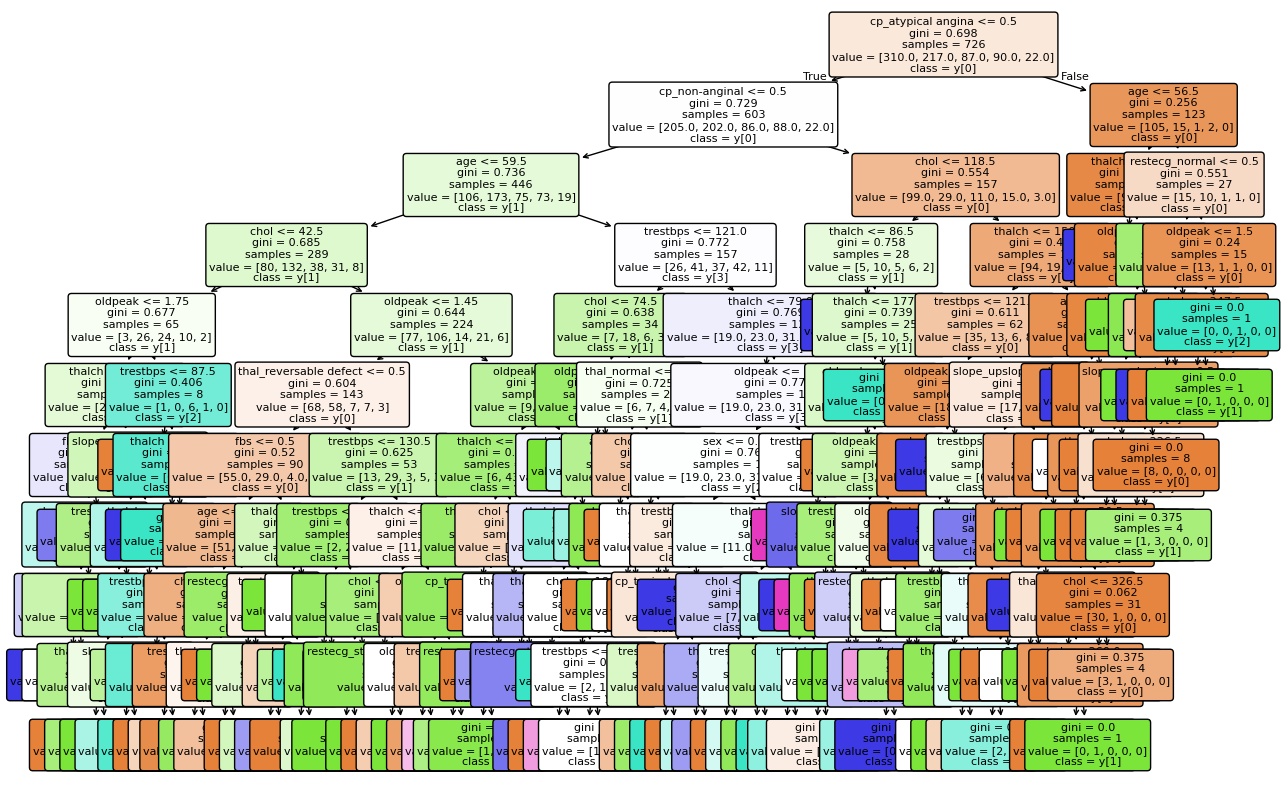

In [17]:
# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(best_model, feature_names=X.columns, class_names=True, filled=True, rounded=True, fontsize=8)
plt.show()

# Interview Questions

### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
- max_depth: Controls the maximum depth of the tree. Prevents overfitting when set to a lower value.
- min_samples_split: Minimum number of samples required to split a node. Higher values make the model more generalized.
- min_samples_leaf: Minimum number of samples required in a leaf node. Prevents small, unreliable leaf nodes.
- criterion: Measures the quality of a split (`gini` or `entropy`). Gini is faster, while entropy is more informative.
- max_features: Number of features to consider for the best split. Reduces overfitting and speeds up the model.

### 2. What is the difference between the Label encoding and One-hot encoding?
- Label Encoding:
  - Converts categories into numerical values (e.g., 0, 1, 2).
  - Suitable for ordinal data (e.g., Low, Medium, High).
  - May create a false relationship between numerical values.

- One-Hot Encoding:
  - Creates separate binary columns for each category.
  - Suitable for nominal data (e.g., Colors: Red, Blue, Green).
  - Increases the dimensionality of the dataset.